<a href="https://colab.research.google.com/github/Pallavi-Gurve/ML-Project-Car-Data/blob/master/ML_project_pallavi_gurve_cardata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**EXPLORATORY DATA ANALYSIS IN PYTHON.**

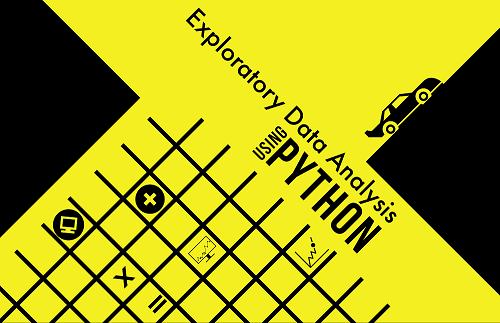

#1. Importing the required libraries for EDA:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline   
plt.rcParams["figure.figsize"] = (10,6)  

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


##1.1 Loading the data into the dataframe.

In [3]:
import io
df = pd.read_csv(io.BytesIO(uploaded['data.csv']))

In [4]:
# To display all the rows 
df 

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


##1.2 Checking the types of data and basic summary stats

In [5]:
df.columns
#gives the list of Column names in the dataframe

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [6]:
df.info()
#gives the information about each of the column i.e data types, null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [7]:
df.describe()
#gives the statistical data 

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


#2. Dropping irrelevant columns:

Since, there are columns which we never use and in such cases dropping is useful. Here, Columns such as No. of doors and market category are not very relevent.


In [8]:
df = df.drop(['Number of Doors','Market Category'], axis=1)
df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,Midsize,4dr Hatchback,23,16,204,50920


#3. Renaming the columns:

In [9]:
df = df.rename(columns={"Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", 
                        "Driven_Wheels":"Drive Mode","highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price" })

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Make              11914 non-null  object 
 1   Model             11914 non-null  object 
 2   Year              11914 non-null  int64  
 3   Engine Fuel Type  11911 non-null  object 
 4   HP                11845 non-null  float64
 5   Cylinders         11884 non-null  float64
 6   Transmission      11914 non-null  object 
 7   Drive Mode        11914 non-null  object 
 8   Vehicle Size      11914 non-null  object 
 9   Vehicle Style     11914 non-null  object 
 10  MPG-H             11914 non-null  int64  
 11  MPG-C             11914 non-null  int64  
 12  Popularity        11914 non-null  int64  
 13  Price             11914 non-null  int64  
dtypes: float64(2), int64(5), object(7)
memory usage: 1.3+ MB


In [11]:
df

,Make,Model,Year,Engine Fuel Type,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,Midsize,4dr Hatchback,23,16,204,50920


#4. Dropping the duplicate rows:

In [12]:
#Total No. of Rows and Columns
df.shape

(11914, 14)

In [13]:
#Rows containing duplicate data
duplicate_rows_df=df[df.duplicated()]
print("number of duplicate rows: ",duplicate_rows_df.shape)

number of duplicate rows:  (721, 14)


In [14]:
#Used to count number of rows before removing the data
df.count()

Make                11914
Model               11914
Year                11914
Engine Fuel Type    11911
HP                  11845
Cylinders           11884
Transmission        11914
Drive Mode          11914
Vehicle Size        11914
Vehicle Style       11914
MPG-H               11914
MPG-C               11914
Popularity          11914
Price               11914
dtype: int64

In [15]:
#dropping the duplicate rows
df.drop_duplicates(keep=False,inplace=True)
df

,Make,Model,Year,Engine Fuel Type,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,Midsize,4dr Hatchback,23,16,204,50920


In [16]:
df.shape

(10571, 14)

In [17]:
#Counting Number of rows after removing duplicate values
df.count()

Make                10571
Model               10571
Year                10571
Engine Fuel Type    10568
HP                  10502
Cylinders           10541
Transmission        10571
Drive Mode          10571
Vehicle Size        10571
Vehicle Style       10571
MPG-H               10571
MPG-C               10571
Popularity          10571
Price               10571
dtype: int64

##4.1 Dropping the missing or null values.

In [18]:
# Any missing values?
print(df.isnull().values.any())

True


In [19]:
df.isnull().sum()
#List of Missing Values

Make                 0
Model                0
Year                 0
Engine Fuel Type     3
HP                  69
Cylinders           30
Transmission         0
Drive Mode           0
Vehicle Size         0
Vehicle Style        0
MPG-H                0
MPG-C                0
Popularity           0
Price                0
dtype: int64

In [20]:
#droping NaN values
df = df.dropna()
df.count()

Make                10470
Model               10470
Year                10470
Engine Fuel Type    10470
HP                  10470
Cylinders           10470
Transmission        10470
Drive Mode          10470
Vehicle Size        10470
Vehicle Style       10470
MPG-H               10470
MPG-C               10470
Popularity          10470
Price               10470
dtype: int64

In [21]:
#After dropping the values
print(df.isnull().sum())

Make                0
Model               0
Year                0
Engine Fuel Type    0
HP                  0
Cylinders           0
Transmission        0
Drive Mode          0
Vehicle Size        0
Vehicle Style       0
MPG-H               0
MPG-C               0
Popularity          0
Price               0
dtype: int64


#5. Detecting Outliers:
An outlier is a point or set of points that are different from other points.Sometimes they can be very high or very low.Outliers are one of the primary reasons for resulting in a less accurate model.
In the below plots,there are points outside the box they are none other than outliers.


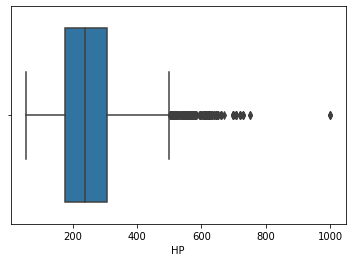

In [22]:
sns.boxplot(x=df['HP'])

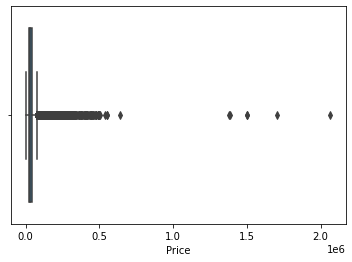

In [23]:
sns.boxplot(x=df['Price'])

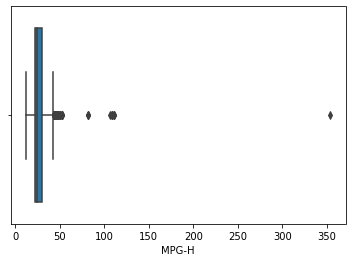

In [24]:
sns.boxplot(x=df['MPG-H'])

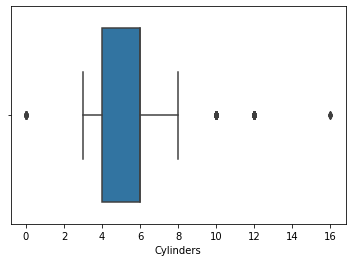

In [25]:
sns.boxplot(x=df['Cylinders'])

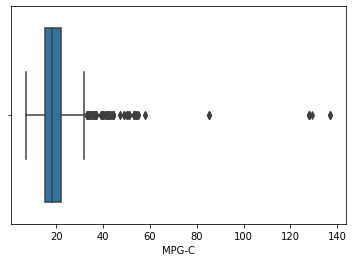

In [26]:
sns.boxplot(x=df['MPG-C'])

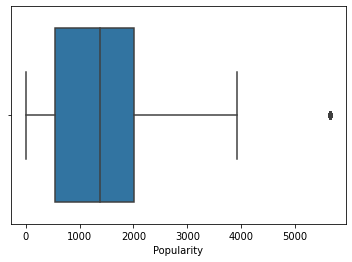

In [27]:
sns.boxplot(x=df['Popularity'])

In [28]:
#Finding  Inter Quartile Range
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Year              9.0
HP              131.0
Cylinders         2.0
MPG-H             8.0
MPG-C             7.0
Popularity     1460.0
Price         21822.5
dtype: float64


In [29]:
#Check number of outliers in boxplot of different columns before removing them
( (df<(Q1-(1.5*IQR))) | (df>(Q3+(1.5*IQR))) ).sum()

Cylinders           304
Drive Mode            0
Engine Fuel Type      0
HP                  478
MPG-C               217
MPG-H               119
Make                  0
Model                 0
Popularity          765
Price               916
Transmission          0
Vehicle Size          0
Vehicle Style         0
Year                343
dtype: int64

In [30]:
#Removing Outliers
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(8204, 14)

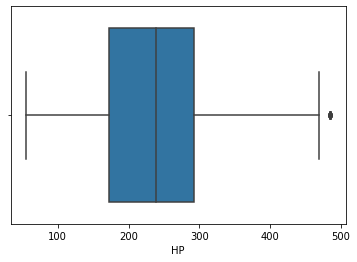

In [31]:
#Boxplot of different columns after removing the outliers
sns.boxplot(x=df['HP'])

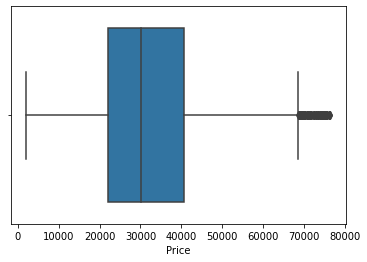

In [32]:
sns.boxplot(x=df['Price'])

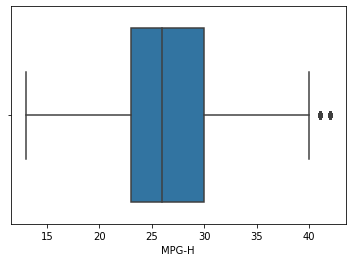

In [33]:
sns.boxplot(x=df['MPG-H'])

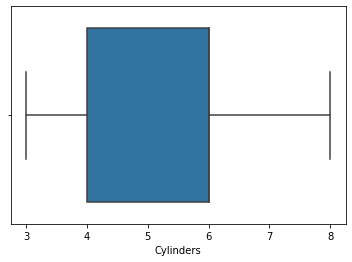

In [34]:
sns.boxplot(x=df['Cylinders'])

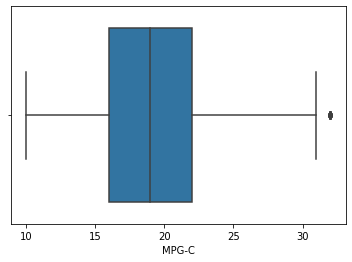

In [35]:
sns.boxplot(x=df['MPG-C'])

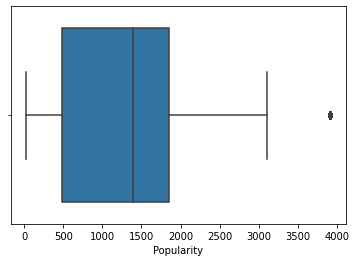

In [36]:
sns.boxplot(x=df['Popularity'])

In [37]:
#Check number of outliers in boxplot of different columns after removing them
( (df<(Q1-(1.5*IQR))) | (df>(Q3+(1.5*IQR))) ).sum()

Cylinders           0
Drive Mode          0
Engine Fuel Type    0
HP                  0
MPG-C               0
MPG-H               0
Make                0
Model               0
Popularity          0
Price               0
Transmission        0
Vehicle Size        0
Vehicle Style       0
Year                0
dtype: int64

#6. Most represented car brands:

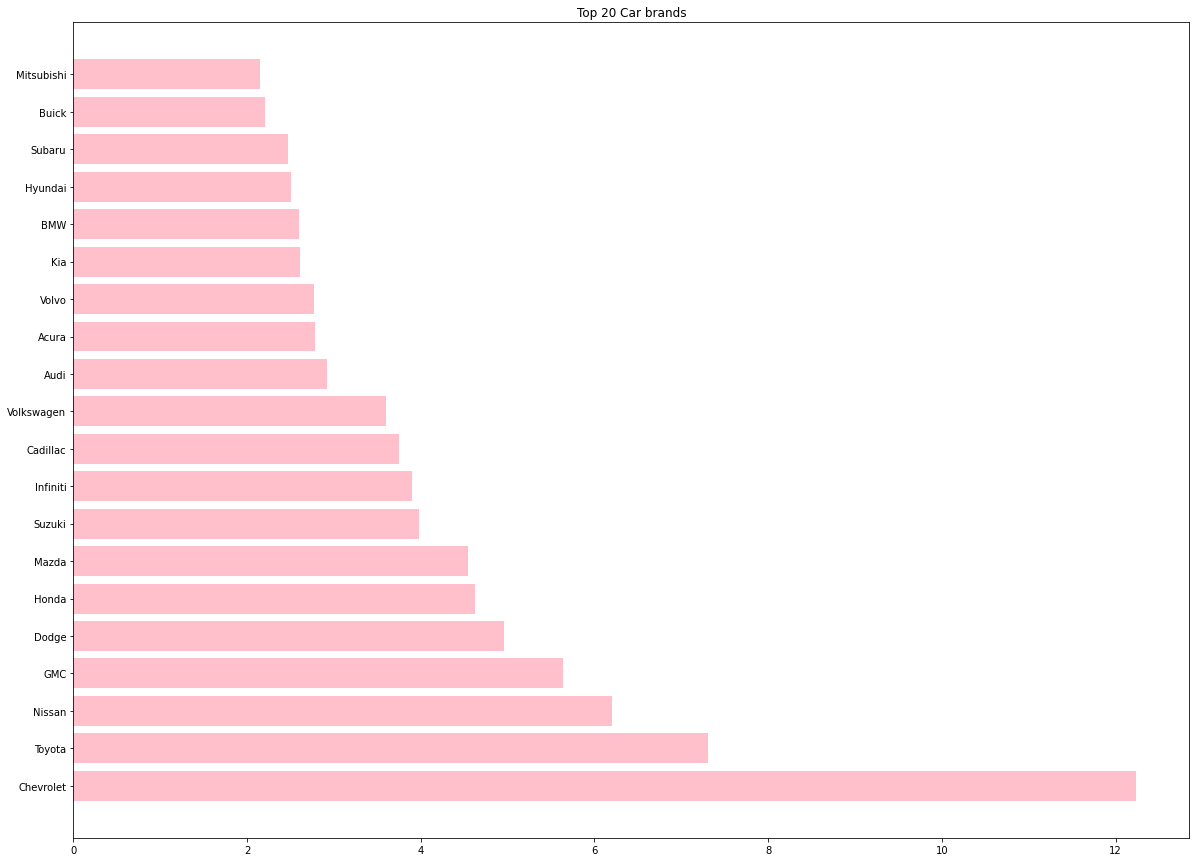

In [38]:
# Percentage of car per brand
counts = df['Make'].value_counts()*100/sum(df['Make'].value_counts())

# Top 20 car brands
popular_labels = counts.index[:20]

# Plot
plt.figure(figsize=(20,15))
plt.barh(popular_labels, width=counts[:20],color="Pink")
plt.title('Top 20 Car brands')
plt.show()

In [39]:
#Average price among the top car brands
prices=df[["Make","Price"]].loc[(df["Make"]=="Chervolet") | (df["Make"]=="Ford") | (df["Make"]=="Toyota") |
                                (df["Make"]=="Nissan") | (df["Make"]=="GMC") | (df["Make"]=="Dodge") | 
                                (df["Make"]=="Honda") | (df["Make"]=="Cadillac") | (df["Make"]=="Mazda") |
                                (df["Make"]=="Volkswagen")].groupby("Make").mean()
#Print average price of top 20 car brands
print (prices)

                   Price
Make                    
Cadillac    50509.370130
Dodge       26178.358722
GMC         33666.516199
Honda       27038.467018
Mazda       20628.445040
Nissan      28559.636542
Toyota      28759.360000
Volkswagen  30449.461017


#7.Correlation matrix:

##7.1 Plot the correlation matrix

In [40]:
df.corr()

,Year,HP,Cylinders,MPG-H,MPG-C,Popularity,Price
Year,1.000000,0.329259,-0.085730,0.357681,0.319505,0.208509,0.579331
HP,0.329259,1.000000,0.745470,-0.464840,-0.564341,0.099750,0.746944
Cylinders,-0.085730,0.745470,1.000000,-0.690858,-0.744093,0.019341,0.405795
MPG-H,0.357681,-0.464840,-0.690858,1.000000,0.937103,0.095116,-0.134963
MPG-C,0.319505,-0.564341,-0.744093,0.937103,1.000000,0.084180,-0.211754
Popularity,0.208509,0.099750,0.019341,0.095116,0.084180,1.000000,0.114641
Price,0.579331,0.746944,0.405795,-0.134963,-0.211754,0.114641,1.000000


##Heatmap

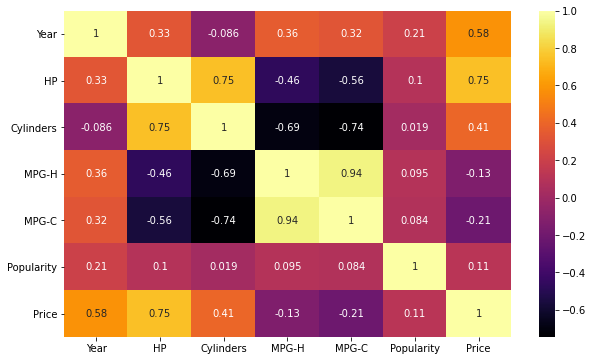

In [41]:
#plotting Correlation matrix
plt.figure(figsize=(10,6))
c= df.corr()
sns.heatmap(c,cmap="inferno",annot=True)

##7.2 Documents your insights

1. We conclude that HP and Cylinders both are correlated positively with each other

2. Price is correlated with Year and HP positively

3. MPG-C and MPG-H both have very less correlation in each other

4. MPG-C and MPG-H both have strong negitive correlation with Cylinders

5. Popularity is not correlated with anything

#8.Exploratory Data Analysis:

##8.1 Plot different Graphs

##Scatterplot

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


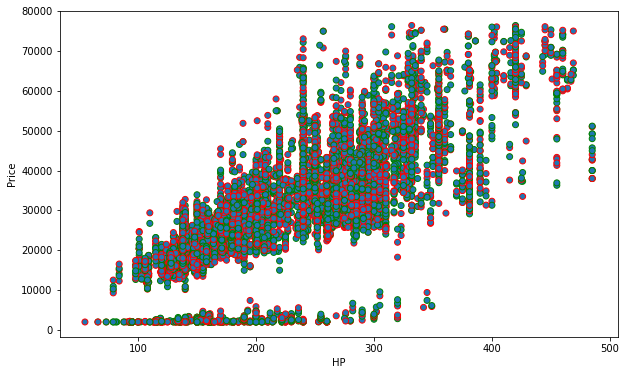

In [42]:
#Graph between price and HP
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['HP'], df['Price'], edgecolors='rg')
ax.set_xlabel('HP')
ax.set_ylabel('Price')
plt.show()

##Bar Graph

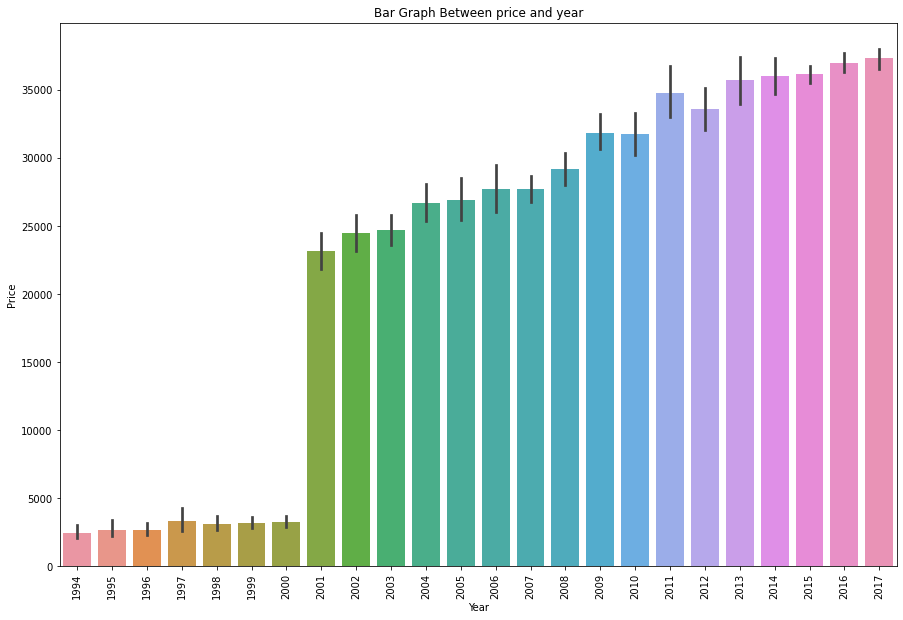

In [43]:
#Graph between Price and Year
df['Vehicle Style'].value_counts().plot.bar(figsize=(15,10))
plt.title("Bar Graph Between price and year")
plt.ylabel('Year')
plt.xlabel('Price');
sns.barplot(df['Year'],df['Price'])

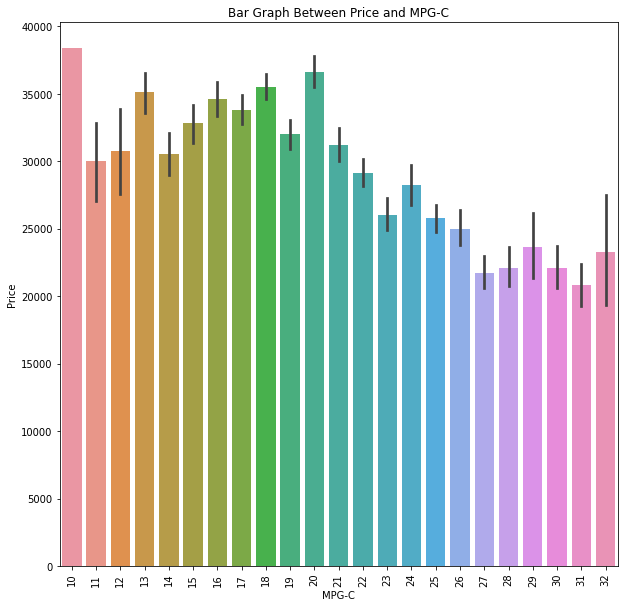

In [44]:
#Graph between Price and MPG-C
df['Vehicle Style'].value_counts().plot.bar(figsize=(10,10))
plt.title("Bar Graph Between Price and MPG-C")
plt.ylabel('MPG-C')
plt.xlabel('Price');
sns.barplot(df['MPG-C'],df['Price'])

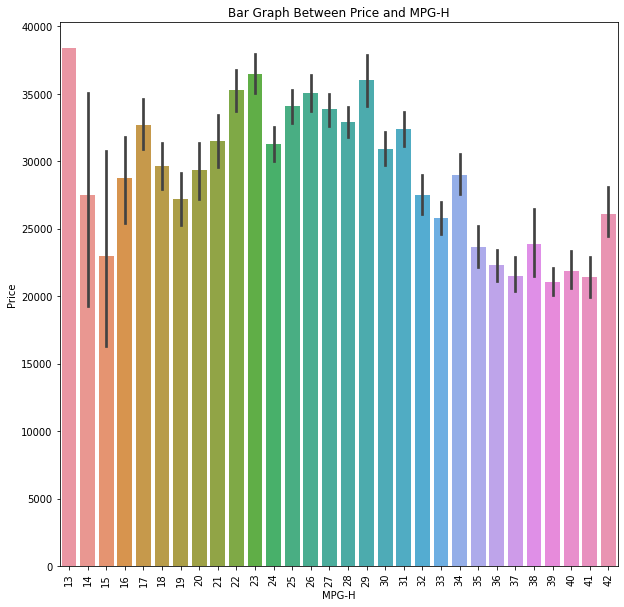

In [45]:
#Graph between Price and MPG-H
df['Vehicle Style'].value_counts().plot.bar(figsize=(10,10))
plt.title("Bar Graph Between Price and MPG-H")
plt.ylabel('MPG-H')
plt.xlabel('Price');
sns.barplot(df['MPG-H'],df['Price'])

Text(0.5, 0, 'Count of vehicles')

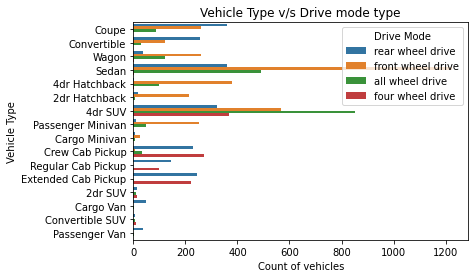

In [46]:
#Vehicle Style type and Drive type analysis
sns.countplot(y='Vehicle Style',data=df,hue='Drive Mode')
plt.title("Vehicle Type v/s Drive mode type")
plt.ylabel('Vehicle Type')
plt.xlabel('Count of vehicles')

In [47]:
#Create a new column 'Price_group' and assign the value based on car price
df['price_group']=pd.cut(df['Price'],[0,20000,40000,60000,80000,100000,600000],
                         labels=['<20k','20-39k','40-59k','60-79k','80-99k','>100k'],include_lowest=True)
df['price_group']=df['price_group'].astype(object)

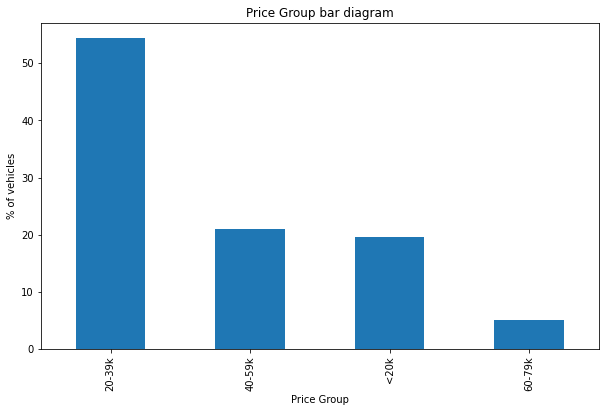

In [48]:
(df['price_group'].value_counts() / len(df) *100).plot.bar(figsize=(10,6))
plt.title("Price Group bar diagram")
plt.ylabel('% of vehicles')
plt.xlabel('Price Group');

##8.2 Conclusion after plotting different graphs

1. After plotting graph between Year and Price we conclude that as Year increase Price also increase.

2. As value of HP insrease Price will also increase.

3. Price will decrease with the value of MPG-H and MPG-C.

4. Popularity is not effecting the Price.

#9. Base ML model:

In [49]:
X=df[['Popularity','Year','HP','Cylinders','MPG-H','MPG-C']].values
y=df['Price'].values

In [50]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
sc_y=StandardScaler()
X=sc_X.fit_transform(X)
y=sc_y.fit_transform(y.reshape(-1,1))

In [52]:
#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [53]:
#Fitting Multiple Linaer Regression to the Training set
from sklearn.linear_model import LinearRegression 
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

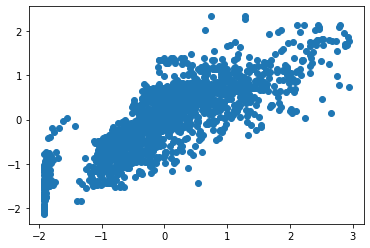

In [54]:
#Predicting the Test set results
y_pred=regressor.predict(X_test)
plt.scatter(y_test,y_pred)

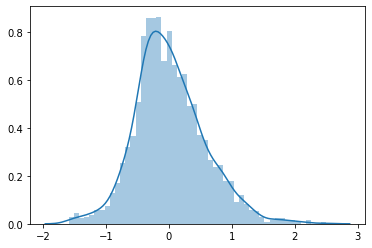

In [55]:
sns.distplot((y_test-y_pred),bins=50)

In [56]:
#Finding the value of MAE, RMSE and R-Square
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('R2 Score:',metrics .r2_score(y_test,y_pred))

Mean Absolute Error: 0.4291332950998116
Root Mean Squared Error: 0.5568153756084274
R2 Score: 0.6768021830869809


#10. Spot checking algorithms:

In [57]:
#Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=4)
X_poly=poly_reg.fit_transform(X_train)
poly_reg.fit(X_poly,y_train)
lin_reg_2=LinearRegression()
lin_reg_2.fit(X_poly,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

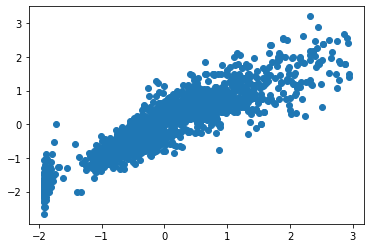

In [58]:
#Predicting a new result with Polynomial Regression
y_pred=lin_reg_2.predict(poly_reg.fit_transform(X_test))
plt.scatter(y_test,y_pred)

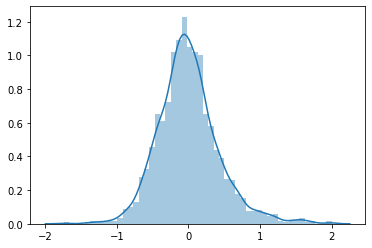

In [59]:
sns.distplot((y_test-y_pred),bins=50)

In [60]:
print('Mean Squared Error:',metrics.mean_absolute_error(y_test,y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('R2 Score:',metrics.r2_score(y_test,y_pred))

Mean Squared Error: 0.31976659406479074
Root Mean Squared Error: 0.4296162287965929
R2 Score: 0.8075989945045208


In [61]:
#Fitting SVR to the dataset
from sklearn.svm import SVR
regressor=SVR(kernel='rbf')
regressor.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

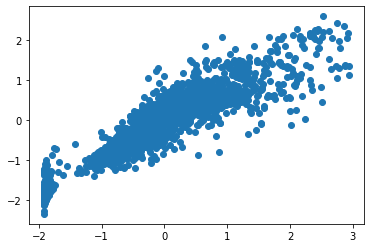

In [62]:
#Predicting a new result
y_pred=regressor.predict(X_test)
plt.scatter(y_test,y_pred)

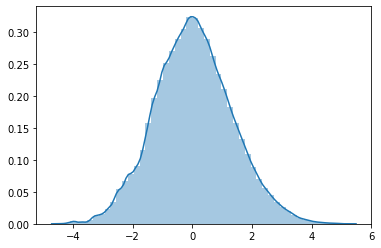

In [63]:
sns.distplot((y_test-y_pred),bins=50)

In [64]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('R2 Score:',metrics.r2_score(y_test,y_pred))

Mean Absolute Error: 0.3079259997026139
Root Mean Squared Error: 0.43227461645882614
R2 Score: 0.8052105422682436


In [65]:
#Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators=300,random_state=0)
regressor.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

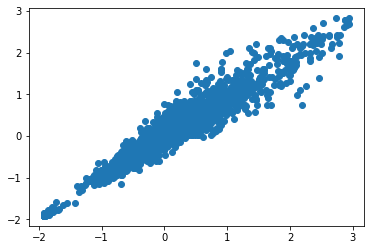

In [66]:
y_pred=regressor.predict(X_test)
plt.scatter(y_test,y_pred)

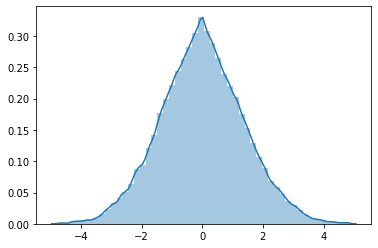

In [67]:
sns.distplot((y_test-y_pred),bins=50)

In [68]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('R2 Score:',metrics.r2_score(y_test,y_pred))

Mean Absolute Error: 0.1819573863147006
Root Mean Squared Error: 0.2533085138353747
R2 Score: 0.9331124091098603
